In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("dataset_Facebook.csv",delimiter=";")

In [3]:
dataset

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [4]:
dataset.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [5]:
mean_value = dataset['Paid'].mean()
dataset['Paid'].fillna(value=mean_value, inplace=True)

In [6]:
mean_value1 = dataset['like'].mean()
dataset['like'].fillna(value=mean_value1, inplace=True)

In [7]:
mean_value2 = dataset['share'].mean()
dataset['share'].fillna(value=mean_value2, inplace=True)

In [8]:
y = dataset.iloc[:,0].values

In [9]:
x = dataset.iloc[:,2:].values

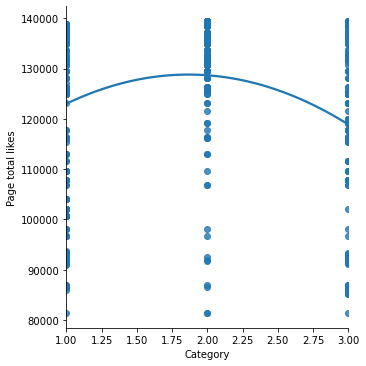

In [10]:
sns.lmplot(x ="Category", y ="Page total likes", data = dataset, order = 2, ci = None)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [12]:
#from sklearn.preprocessing import Normalizer

In [13]:
#normalizer = Normalizer()
#normalized_train_X = normalizer.fit_transform(x_train)

In [14]:
#normalized_test_x=normalizer.transform(x_test)

In [15]:
#y_train = np.array(y_train).reshape((-1, 375))

In [16]:
#y_test = np.array(y_test).reshape((-1, 125))

In [17]:
#from sklearn.preprocessing import MinMaxScaler
#target_scaler = MinMaxScaler()
#target_scaler.fit(y_train)
#y_train = target_scaler.transform(y_train)
#y_test = target_scaler.transform(y_test)

In [18]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [19]:
regr.score(x_test, y_test)

0.8541868046780623

In [20]:
yy=regr.predict(x_test).round()

In [21]:
yy

array([118209.,  99956.,  95915., 113540., 110467.,  98505., 117508.,
       103931., 122294., 102871., 145692., 116120., 139023., 135423.,
       103839., 117614., 127145., 129515., 126883.,  94667., 109685.,
       135046., 110015., 122598., 124749., 126836., 130135., 127433.,
       134897., 119396., 109562., 144733., 113488., 122970., 135083.,
       118551., 109737., 104525., 145003., 101427., 121373., 122087.,
       100167., 100398.,  97494., 133043., 127056., 112309., 132122.,
       104108., 118266., 131560., 107394., 104170., 113564., 120311.,
       136759., 143543., 117657., 140184., 136889., 145997., 131805.,
       104421., 109174.,  99682., 111866., 115032., 132127., 136442.,
        97689., 109827., 135245., 116437., 120079., 108347., 105789.,
       145408., 141350., 141252., 135185., 115141., 103933., 110078.,
       141185.,  96334., 117009., 118714., 114069., 123326., 133885.,
       114733., 139000., 132448., 134601., 130835., 138671., 124568.,
       110206., 1050

In [22]:
y_test

array([124940,  91651,  85979, 119198, 106928,  86909, 123047, 104070,
       128032,  98195, 139441, 116435, 136013, 136393,  96749, 125612,
       132201, 132817, 133594,  85979, 115368, 136393, 109670, 126424,
       128032, 132817, 131808, 132817, 136642, 123047, 113028, 138353,
       119198, 131630, 136736, 123047, 106928,  98195, 139441,  92721,
       126424, 128032,  91544,  93256,  86909, 134879, 133679, 116091,
       135700, 100732, 121540, 135617, 102112, 100732, 119198, 125612,
       135713, 138895, 125612, 137177, 135713, 138895, 134879, 102112,
       109670,  91330, 115368, 117764, 135428, 136013,  93470, 109670,
       137020, 124940, 128032, 109670,  96749, 138414, 137893, 137059,
       136393, 120050, 100732, 106928, 137059,  85093, 125612, 124940,
       116091, 126141, 136393, 117764, 137177, 135617, 136393, 135195,
       137059, 129600, 111620, 104070, 129600, 130791, 132817, 135428,
       100732, 135713, 123047, 138414, 138329, 104070, 123047,  98195,
      

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error, r2_score
accuracy_score(y_test, yy)
confusion_matrix(y_test, yy)
mse = mean_squared_error(y_test, yy)
r2 = r2_score(y_test, yy)

In [24]:
accuracy_score(y_test, yy)

0.0

In [25]:
confusion_matrix(y_test, yy)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
mse = mean_squared_error(y_test, yy)

In [27]:
mse 

40376282.272

In [28]:
r2

0.8541840456537795